In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [3]:
arc = 'compensacion-ejecutivos.sav'
df,meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [4]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'],axis = 1)

In [5]:
reg_lin = sm.OLS(y,sm.add_constant(X)).fit()

In [6]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 05 May 2021   Prob (F-statistic):           7.37e-38
Time:                        20:38:13   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

## Errores:
Los errores se distribuyen de manera normal

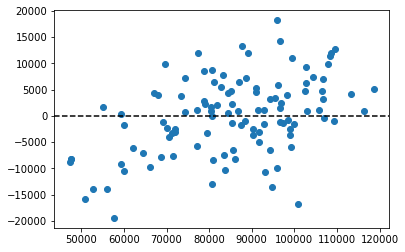

In [7]:
fig,ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter(y,y-y_pred)
plt.axhline(y=0,color='black',linestyle='--')

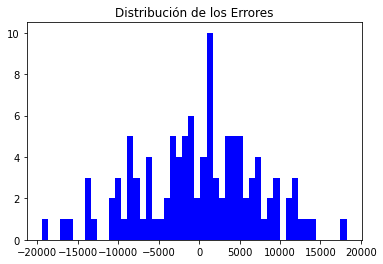

In [8]:
e = y-y_pred
fig,ax = plt.subplots()
ax.hist(e,bins=50,color='blue')
ax.set_title('Distribución de los Errores')
plt.show()

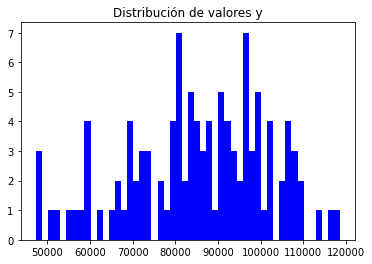

In [9]:
fig,ax = plt.subplots()
ax.hist(y,bins=50,color='blue')
ax.set_title('Distribución de valores y')
plt.show()

In [10]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [11]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

# Regresión Logistica

In [12]:
y = np.where(df['salario'] > 96000,1,0)
X = df.drop(['salario'],axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

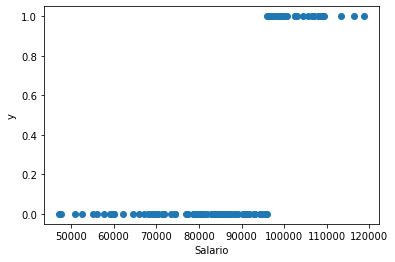

In [13]:
fig,ax = plt.subplots()
ax.scatter(df.salario,y)
ax.set_xlabel('Salario')
ax.set_ylabel('y')
plt.show()

In [14]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)
y_estimado_probabilidad = reg_log.predict_proba(X)[:,1] # Probabilidad de mayor
y_estimado_valor = reg_log.predict(X)

In [15]:
y_estimado_valor

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [16]:
y == y_estimado_valor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
metrics.accuracy_score(y,reg_log.predict(X))

0.9090909090909091

In [18]:
reg_log.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'